# Figure Generation for Manuscript

In [13]:
import os
from pathlib import Path
from IPython.display import Image, display, SVG

from cairosvg import svg2png
from lxml import etree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from svgutils.compose import Unit
import svgutils.transform as sg

## Figure 1

This figure is designed to show the need for orthogonal procrustes.
Idea here is that word2vec generates words arbitrarily and direct comparison is meaningless without an alignment factor.
1. Panel A - Show umap plot of word models without alignment
2. Panel B - Show umap plot of the same word models with alignment
3. Panel C - Show same umap plot but with two examples that show intra year variability (show the opacity plot with word such as 'of', 'interleukin-18', 'pandemic')

In [26]:
umap_visualization_path = Path(
    "../multi_model_revamp/output/figure_data_and_figures/alignment_visualization"
)

In [27]:
panel_one = sg.fromfile(umap_visualization_path / "unaligned_2010_plot.svg")

# Convert pt units to pixel units
# Vince's tutorial FTW
panel_one_size = (
    np.round(float(panel_one.root.attrib["width"][:-2]) * 1.33, 0),
    np.round(float(panel_one.root.attrib["height"][:-2]) * 1.33, 0),
)

scale_x = 1.4
scale_y = 1.4

print(f"original: {panel_one_size}")
print(f"scaled:{(panel_one_size[0]*scale_x,panel_one_size[1]*scale_y)}")

panel_one = panel_one.getroot()
panel_one.scale(x=scale_x, y=scale_y)
panel_one.moveto(50, 50)

original: (666.0, 436.0)
scaled:(932.4, 610.4)


In [28]:
panel_two = sg.fromfile(umap_visualization_path / "unaligned_2010_probiotics_plot.svg")

panel_two_size = (
    np.round(float(panel_two.root.attrib["width"][:-2]) * 1.33, 0),
    np.round(float(panel_two.root.attrib["height"][:-2]) * 1.33, 0),
)
scale_x = 1.4
scale_y = 1.4

print(f"original: {panel_two_size}")
print(f"scaled:{(panel_two_size[0]*scale_x, panel_two_size[1]*scale_y)}")

panel_two = panel_two.getroot()
panel_two.scale(x=scale_x, y=scale_y)
panel_two.moveto(954, 50)

original: (666.0, 436.0)
scaled:(932.4, 610.4)


In [29]:
panel_three = sg.fromfile(umap_visualization_path / "aligned_2010_probiotics_plot.svg")

panel_three_size = (
    np.round(float(panel_three.root.attrib["width"][:-2]) * 1.33, 0),
    np.round(float(panel_three.root.attrib["height"][:-2]) * 1.33, 0),
)
scale_x = 1.4
scale_y = 1.4

print(f"original: {panel_three_size}")
print(f"scaled:{(panel_three_size[0]*scale_x, panel_three_size[1]*scale_y)}")

panel_three = panel_three.getroot()
panel_three.scale(x=scale_x, y=scale_y)
panel_three.moveto(50, 631)

original: (676.0, 436.0)
scaled:(946.4, 610.4)


In [30]:
panel_one_label = sg.TextElement(30, 30, "A", size=30, weight="bold")
panel_two_label = sg.TextElement(954, 30, "B", size=30, weight="bold")
panel_three_label = sg.TextElement(30, 631, "C", size=30, weight="bold")

In [31]:
figure_one = sg.SVGFigure(Unit(1650), Unit(1200))

figure_one.append(
    [
        etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
        panel_one,
        panel_two,
        panel_three,
        panel_one_label,
        panel_two_label,
        panel_three_label,
    ]
)
# display(SVG(figure_one.to_str()))

In [32]:
# save generated SVG files
figure_one.save("output/Figure_1.svg")
svg2png(bytestring=figure_one.to_str(), write_to="output/Figure_1.png", dpi=600)

In [33]:
os.system(
    "convert -compress LZW -alpha remove output/Figure_1.png output/Figure_1.tiff"
)
os.system("mogrify -alpha off output/Figure_1.tiff")

0

## Figure 2

This figure is to show the validation of the metric which is Qst.
This metric accounts for the intra year instability within each word2vec model.
1. Panel - shows the percent difference validation I had for the tokens across the years

In [34]:
novel_distance_visualization_path = Path(
    "../multi_model_revamp/output/figure_data_and_figures/novel_distance_visualization"
)

In [35]:
panel_one = sg.fromfile(
    novel_distance_visualization_path / "percent_difference_2010-2011_plot.svg"
)

# Convert pt units to pixel units
# Vince's tutorial FTW
panel_one_size = (
    np.round(float(panel_one.root.attrib["width"][:-2]) * 1.33, 0),
    np.round(float(panel_one.root.attrib["height"][:-2]) * 1.33, 0),
)

scale_x = 1
scale_y = 1

print(f"original: {panel_one_size}")
print(f"scaled:{(panel_one_size[0]*scale_x,panel_one_size[1]*scale_y)}")

panel_one = panel_one.getroot()
panel_one.scale(x=scale_x, y=scale_y)
panel_one.moveto(50, 50)

original: (810.0, 445.0)
scaled:(810.0, 445.0)


In [36]:
panel_one_label = sg.TextElement(30, 30, "A", size=30, weight="bold")

In [37]:
figure_two = sg.SVGFigure(Unit(900), Unit(480))

figure_two.append(
    [
        etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
        panel_one,
        panel_one_label,
    ]
)
# display(SVG(figure_two.to_str()))

In [38]:
# save generated SVG files
figure_two.save("output/Figure_2.svg")
svg2png(bytestring=figure_two.to_str(), write_to="output/Figure_2.png", dpi=600)

In [39]:
os.system(
    "convert -compress LZW -alpha remove output/Figure_2.png output/Figure_2.tiff"
)
os.system("mogrify -alpha off output/Figure_2.tiff")

0

## Figure 3

Use this metric through the SCAF approach to detect the specific timepoint at which a word has undergone a drastic shift.
Idea here is to provide rational that my correction method actually improves detection
1. Panel A - Time point example for lung cancer
2. Panel B - show wordcloud for this case study and let the users see the shift in semantics
3. Could also think about providing the word pandemic or coronavirus as a positive control for this case

In [40]:
neighbor_table_path = Path(
    "../multi_model_revamp/output/figure_data_and_figures/neighbor_tables"
)

In [41]:
tables_to_show = list(neighbor_table_path.rglob("*tsv"))
for table in tables_to_show:
    token_table = pd.read_csv(str(table), sep="\t", index_col=0)
    print(table.stem)
    display(token_table)
    print()

pandemic_neighbors_2019-2020


,0,1,2,3,4,5,6,7,8,9
2000,epidemic,epizootic,influenza b virus (species_11520),h3n2 subtype (species_119210),1918,zoonosis,h1n1 subtype (species_114727),japanese encephalitis virus (species_11072),outbreak,poliomyelitis (mesh_d011051)
2001,epidemic,poliomyelitis (mesh_d011051),variola virus (species_10255),influenza a virus (species_11320),plague,epizootic,h3n2 subtype (species_119210),polio,1918,"encephalitis, arbovirus (mesh_d004671)"
2002,epidemic,variola virus (species_10255),1918,h5n1 subtype (species_102793),epizootic,resurgence,influenza a virus (species_11320),plague,flavivirus,h1n1 subtype (species_114727)
2003,epidemic,influenza b virus (species_11520),h5n1 subtype (species_102793),1918,reemergence,outbreak,variola,bioterrorism,h3n2 subtype (species_119210),influenza a virus (species_11320)
2004,epidemic,1918,variola virus (species_10255),influenza a virus (a/wsn/1933(h1n1)) (species_...,h5n1 subtype (species_102793),reemergence,outbreak,unidentified influenza virus (species_11309),influenza a virus (species_11320),plague
2005,epidemic,flu,variola virus (species_10255),outbreak,unidentified influenza virus (species_11309),bioterrorism,h5n1 subtype (species_102793),1918,influenza a virus (species_11320),influenza
2006,epidemic,outbreak,influenza a virus (species_11320),unidentified influenza virus (species_11309),SARS1 (gene_6301),disaster,influenza,1918,flu,variola virus (species_10255)
2007,epidemic,outbreak,influenza,bioterrorism,influenza a virus (species_11320),h5n1 subtype (species_102793),severe acute respiratory syndrome (mesh_d045169),unidentified influenza virus (species_11309),disaster,flu
2008,epidemic,outbreak,influenza,variola virus (species_10255),disaster,severe acute respiratory syndrome (mesh_d045169),influenza a virus (species_11320),unidentified influenza virus (species_11309),bioterrorism,1918
2009,epidemic,outbreak,influenza,h1n1 subtype (species_114727),influenza a virus (species_11320),unidentified influenza virus (species_11309),severe acute respiratory syndrome (mesh_d045169),disaster,"influenza, human (mesh_d007251)",variola virus (species_10255)



medrxiv_neighbors_2019-2020


,0,1,2,3,4,5,6,7,8,9
2018,preprint,biorxiv,hackathon,ajhp,directorship,tuveson,agbiodata,hhmi,defunct,foldit
2019,informatics,guardant,arxiv,allina,avalere,f1000research,f1000,uconn,elsevi,omada
2020,biorxiv,medrxiv.org,preprint,arxiv,chemrxiv,biorxiv.org,https://www.medrxiv.org/,chinaxiv,researchgate,litcovid
2021,biorxiv,arxiv,preprint,medrxiv.org,litcovid,psyarxiv,chemrxiv,ssrn,biorxiv.org,https://www.medrxiv.org/



cas9_neighbors_2012-2013


,0,1,2,3,4,5,6,7,8,9
2011,cas2,crispr3,cas3,cas1,cse3,cas4,csn1,crispr1,csn2,crispr
2012,cas2,crispr1,cas3,cas1,cas10,crispr3,tracrrna,crispr,csn1,crispr4
2013,sgrna,talen,spcas9,zfns,grna,zfn,dcas9,nickase,pcocas9,crispr
2014,talen,sgrna,grna,zfn,dcas9,zfns,crispr,rgen,grnas,sgrnas
2015,talen,sgrna,zfn,zfns,grna,crispr,spcas9,dcas9,cas9n,sgrnas
2016,crispr,talen,sgrna,grna,zfn,cripsr,sacas9,spcas9,zfns,Cnbd2 (gene_70873)
2017,spcas9,crispr,sacas9,talen,sgrna,grna,Cnbd2 (gene_70873),gene_46806597,cas9n,cripsr
2018,crispr,sgrna,grna,talen,gene_46806597,cripsr,spcas9,cas9n,Cnbd2 (gene_70873),zfn
2019,gene_46806597,crispr,cripsr,grna,Cnbd2 (gene_70873),cas9n,sgrna,zfn,talen,sacas9
2020,gene_46806597,crispr,gene_52200466,Cnbd2 (gene_70873),grna,cripsr,zfn,sgrna,cas-9,talen


## Figure 4 - Website Walkthrough

In [14]:
website_visualization_path = Path("output/website_pieces")

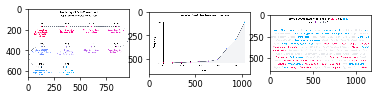

In [23]:
fig = plt.figure(figsize=(10, 10), dpi=60)
gs = fig.add_gridspec(nrows=1, ncols=4)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

ax1.imshow(
    plt.imread(f"{website_visualization_path}/word-lapse-trajectory.png"),
    interpolation="nearest",
)
ax2.imshow(
    plt.imread(f"{website_visualization_path}/word-lapse-frequency.png"),
    interpolation="nearest",
)
ax3.imshow(
    plt.imread(f"{website_visualization_path}/word-lapse-neighbors.png"),
    interpolation="nearest",
)

In [85]:
panel_one = sg.fromfile(website_visualization_path / "word-lapse-trajectory.svg")
svg2png(
    bytestring=panel_one.to_str(),
    write_to=f"{website_visualization_path}/word-lapse-trajectory.png",
    dpi=600,
)
dimensions = list(
    map(lambda x: abs(int(x)), panel_one.root.attrib["viewBox"].split(" "))
)

panel_one_size = (dimensions[0] + dimensions[2], dimensions[1] + dimensions[3])

scale_x = 1
scale_y = 1

print(f"original: {panel_one_size}")
print(f"scaled:{(panel_one_size[0]*scale_x,panel_one_size[1]*scale_y)}")

panel_one = panel_one.getroot()
panel_one.scale(x=scale_x, y=scale_y)
panel_one.moveto(dimensions[0], dimensions[1])

original: (723, 422)
scaled:(723, 422)


In [86]:
panel_two = sg.fromfile(website_visualization_path / "word-lapse-frequency.svg")

dimensions = list(
    map(lambda x: abs(int(x)), panel_two.root.attrib["viewBox"].split(" "))
)

panel_two_size = (dimensions[0] + dimensions[2], dimensions[1] + dimensions[3])
scale_x = 1
scale_y = 1

print(f"original: {panel_two_size}")
print(f"scaled:{(panel_two_size[0]*scale_x, panel_two_size[1]*scale_y)}")

panel_two = panel_two.getroot()
panel_two.scale(x=scale_x, y=scale_y)
panel_two.moveto(dimensions[0] + 723, dimensions[1])

original: (565, 587)
scaled:(565, 587)


In [87]:
panel_three = sg.fromfile(website_visualization_path / "word-lapse-neighbors.svg")

dimensions = list(
    map(lambda x: abs(int(x)), panel_three.root.attrib["viewBox"].split(" "))
)

panel_three_size = (dimensions[0] + dimensions[2], dimensions[1] + dimensions[3])

scale_x = 1
scale_y = 1

print(f"original: {panel_three_size}")
print(f"scaled:{(panel_three_size[0]*scale_x, panel_three_size[1]*scale_y)}")

panel_three = panel_three.getroot()
panel_three.scale(x=scale_x, y=scale_y)
panel_three.moveto(dimensions[0] + 565, dimensions[1])

original: (720, 352)
scaled:(720, 352)


In [88]:
panel_one_label = sg.TextElement(30, 30, "A", size=30, weight="bold")
panel_two_label = sg.TextElement(773, 30, "B", size=30, weight="bold")
panel_three_label = sg.TextElement(1388, 30, "C", size=30, weight="bold")

In [91]:
figure_three = sg.SVGFigure(Unit(1900), Unit(587))

figure_three.append(
    [
        etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
        panel_one,
        panel_two,
        panel_three,
        panel_one_label,
        panel_two_label,
        panel_three_label,
    ]
)
# display(SVG(figure_three.to_str()))

In [92]:
# save generated SVG files
figure_three.save("output/Figure_3.svg")
svg2png(bytestring=figure_three.to_str(), write_to="output/Figure_3.png", dpi=600)

In [ ]:
os.system(
    "convert -compress LZW -alpha remove output/Figure_3.png output/Figure_3.tiff"
)
os.system("mogrify -alpha off output/Figure_3.tiff")